# Przekształcenia wstępne szeregu

In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

#from google.colab import files
#src = list(files.upload().values())[0]
#open('ts_utils.py','wb').write(src)

from ts_utils import check_time_series_stationary
from statsmodels.graphics.tsaplots import plot_acf

Saving ts_utils.ipynb to ts_utils (1).ipynb


Przed przystąpieniem do analizy i prognozowania szeregów powinniśmy odpowiednio przygotować nasze dane.

Przy użyciu określonych przekształceń, możemy 
- wyeliminować z szeregu składowe zmienności,
- ułatwić identyfikację regularnych tendencji.

## Transformacja logarytmiczna

Jeśli w analizowanych danych dostrzegamy, że wariancja wzrasta lub maleje wraz z poziomem szeregu, przydatne może być zastosowanie transformacji logarytmicznej.

Używająć logarytmu, możemy ustabilizować wariancję, a potem kontynuawać kolejne kroki analizy.
Stabilizacja wariancji jest konieczna dla zastosowania modeli stacjonarnych.

**Transformacja logarytmiczna/potęgowa danych przydatna jest między innymi w następujących przypadkach:**
- występowanie wzrostu (lub spadku) amplitudy wahań sezonowych w kolejnych okresach, 
- niejednorodnej zmienności danych w kolejnych okresach,
- dużego wpływu obserwacji odstających

In [11]:
air_passengers = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month')

In [12]:
air_passengers.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


       Dickey-Fuller Test       
--------------------------------

Test Statistic      :     0.8154
p-value             :     0.9919
--------------------------------



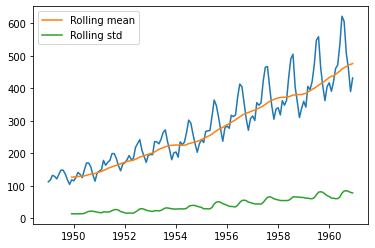

      Autocorrelation plot      
--------------------------------



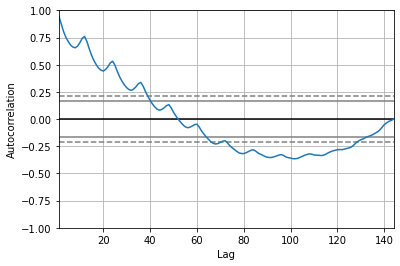

In [13]:
check_time_series_stationary(air_passengers['#Passengers'])

       Dickey-Fuller Test       
--------------------------------

Test Statistic      :    -1.7170
p-value             :     0.4224
--------------------------------



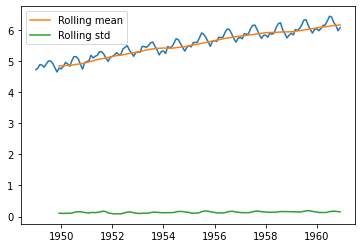

      Autocorrelation plot      
--------------------------------



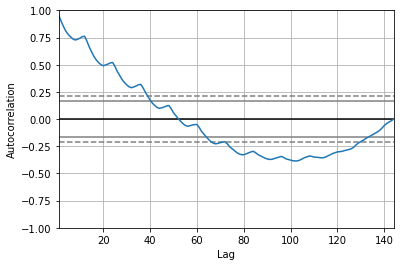

In [14]:
log_air_passengers = np.log(air_passengers)
check_time_series_stationary(log_air_passengers['#Passengers'])

## Różnicowanie 

Operację różnicowania stosujemy między innymi w celu przekształcenia danych do postaci **stacjonarnej**.

Róznicowanie sprowadza się do zastąpienia oryginalnych danych szeregiem różnic, wyznaczonych dla ustalonych opóźnień czasowych. Dobierając odpowiednio parametry różnicowania możemy wyeliminować z danych trend liniowy, kwadratowy, wielomianowy, a także sezonowość. 

### Róźnicowanie z opóźnieniem 1

Wczytaj dane `USGDP.csv` przedstawiające informację na temat kwartalnego produktu krajowego brutto w USA w latach 1947-2006, a następnie zastosuj różnicowanie z opóźnieniem 1 i sprawdź stacjonarność otrzymanego szeregu.

In [15]:
usgdp = pd.read_csv('USGDP.csv', 
                 parse_dates=['DATE'], index_col='DATE')

usgdp.head()

,GDPC1
DATE,
1947-01-01,2033.061
1947-04-01,2027.639
1947-07-01,2023.452
1947-10-01,2055.103
1948-01-01,2086.017


       Dickey-Fuller Test       
--------------------------------

Test Statistic      :     2.9819
p-value             :     1.0000
--------------------------------



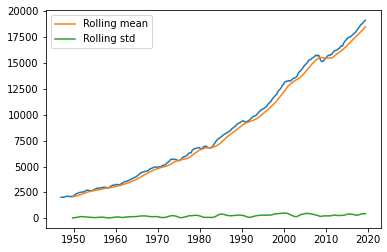

      Autocorrelation plot      
--------------------------------



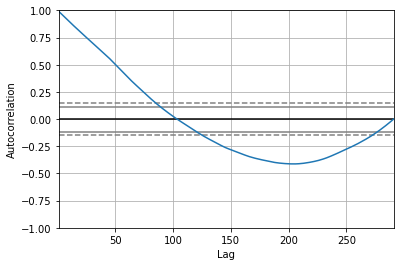

In [16]:
check_time_series_stationary(usgdp.GDPC1)

In [17]:
usgdp_diff = usgdp.diff(1)

       Dickey-Fuller Test       
--------------------------------

Test Statistic      :    -4.1080
p-value             :     0.0009
--------------------------------



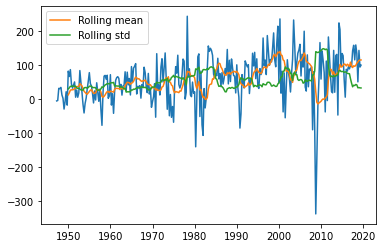

      Autocorrelation plot      
--------------------------------



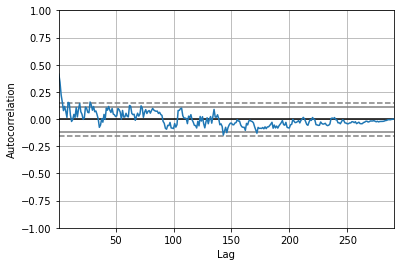

In [18]:
check_time_series_stationary(usgdp_diff.GDPC1.dropna())

       Dickey-Fuller Test       
--------------------------------

Test Statistic      :    -2.7171
p-value             :     0.0711
--------------------------------



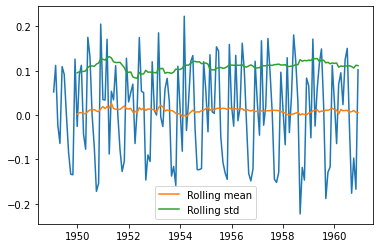

      Autocorrelation plot      
--------------------------------



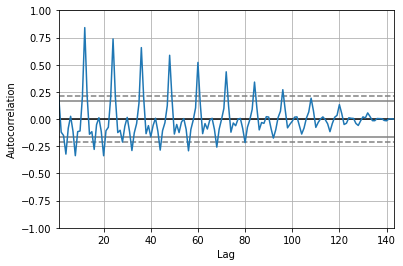

In [24]:
diff_log_air_passengers = log_air_passengers.diff()
check_time_series_stationary(diff_log_air_passengers['#Passengers'].dropna())

### Róźnicowanie z opóźnieniem sezonowym

Różnicowanie szeregu zawierające dwie składowe systematyczne -- trend i sezonowość.

In [25]:
diff_log_air_passengers_diff12 = diff_log_air_passengers.diff(12)
diff_log_air_passengers_diff12.head(14)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


       Dickey-Fuller Test       
--------------------------------

Test Statistic      :    -4.4433
p-value             :     0.0002
--------------------------------



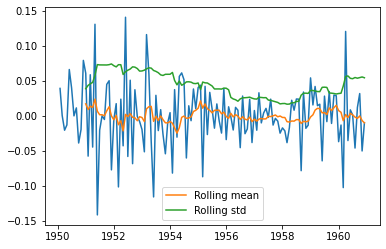

      Autocorrelation plot      
--------------------------------



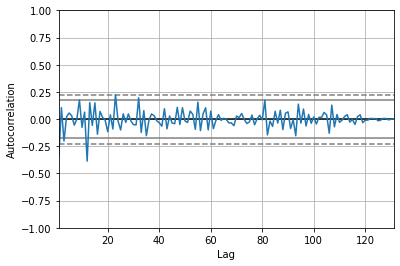

In [26]:
check_time_series_stationary(diff_log_air_passengers_diff12['#Passengers'].dropna())

## Zadanie - `co2`

Wczytaj dane `co2_interpolated.csv` wskazujące stężenie CO2 w atmosferze (więcej pod [linkiem](https://datahub.io/core/co2-ppm)). Następnie korzystając z powyższych metod, spróbuj doprowadzić szereg do postaci stacjonarnej.

In [27]:
co2 = pd.read_csv('co2_interpolated.csv', parse_dates=['Date'], index_col='Date')
co2.head()

,CO2
Date,
1958-03-01,315.71
1958-04-01,317.45
1958-05-01,317.50
1958-06-01,317.10
1958-07-01,315.86


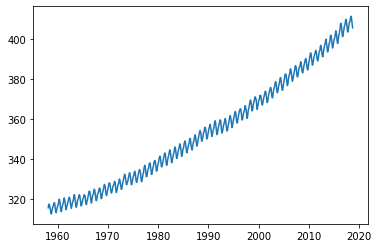

In [28]:
plt.plot(co2)

       Dickey-Fuller Test       
--------------------------------

Test Statistic      :     4.7749
p-value             :     1.0000
--------------------------------



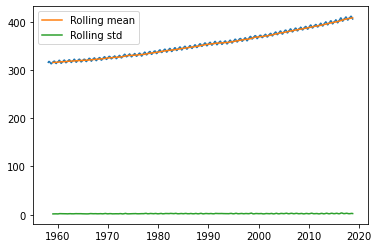

      Autocorrelation plot      
--------------------------------



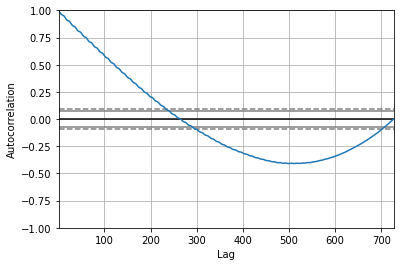

In [29]:
check_time_series_stationary(co2.CO2)

       Dickey-Fuller Test       
--------------------------------

Test Statistic      :    -5.2874
p-value             :     0.0000
--------------------------------



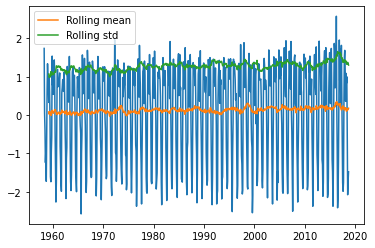

      Autocorrelation plot      
--------------------------------



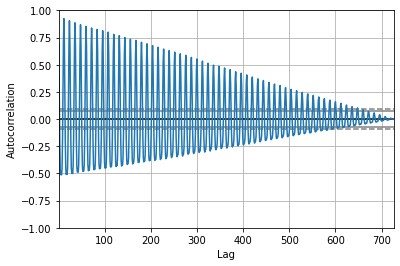

In [30]:
co2_diff = co2.diff()
check_time_series_stationary(co2_diff.CO2.dropna())

       Dickey-Fuller Test       
--------------------------------

Test Statistic      :   -10.8713
p-value             :     0.0000
--------------------------------



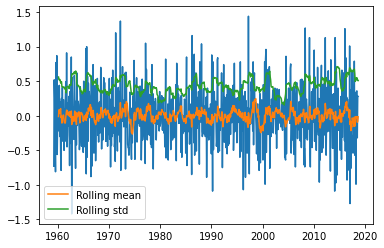

      Autocorrelation plot      
--------------------------------



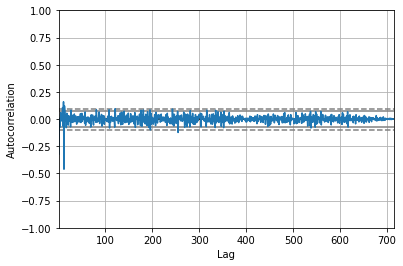

In [32]:
co2_diff_diff12 = co2_diff.diff(12)
check_time_series_stationary(co2_diff_diff12.CO2.dropna())

## Zadanie - `a10`
Wczytaj dane ` a10.csv` opisujące miesięczną sprzedaż leków przeciwcukrzycowych w Australii w latach 1992–2008. Następnie korzystając z powyższych metod, spróbuj doprowadzić szereg do postaci stacjonarnej.

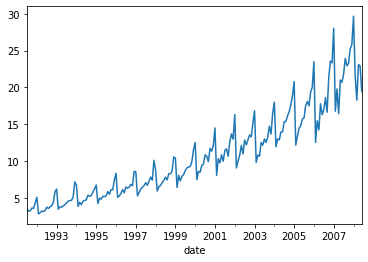

In [33]:
a10 = pd.read_csv('a10.csv', parse_dates=['date'], index_col='date')
a10.plot(legend=False)

       Dickey-Fuller Test       
--------------------------------

Test Statistic      :    -2.4952
p-value             :     0.1167
--------------------------------



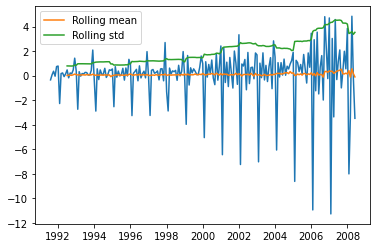

      Autocorrelation plot      
--------------------------------



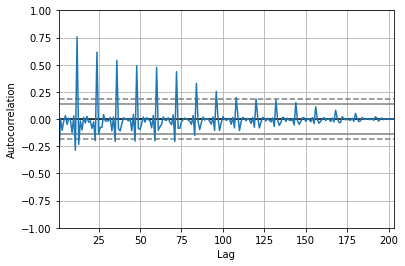

In [34]:
a10_diff = a10.diff()
check_time_series_stationary(a10_diff.value.dropna())

       Dickey-Fuller Test       
--------------------------------

Test Statistic      :    -4.7834
p-value             :     0.0001
--------------------------------



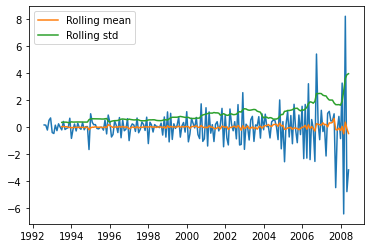

      Autocorrelation plot      
--------------------------------



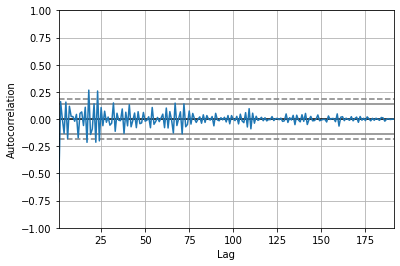

In [35]:
a10_diff_diff12 = a10_diff.diff(12)
check_time_series_stationary(a10_diff_diff12.value.dropna())

       Dickey-Fuller Test       
--------------------------------

Test Statistic      :    -8.2125
p-value             :     0.0000
--------------------------------



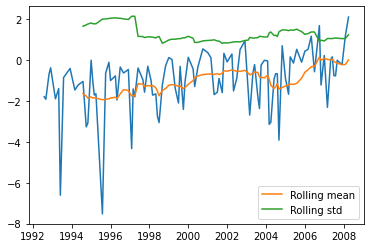

      Autocorrelation plot      
--------------------------------



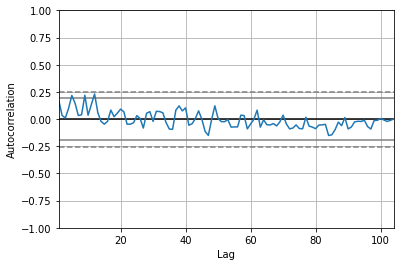

In [37]:
a10_diff_diff12_log = np.log(a10_diff_diff12)
check_time_series_stationary(a10_diff_diff12_log.value.dropna())

## Zadanie - `daily-total-female-births`
Wczytaj dane `daily-total-female-births.csv` przedstawiające całkowitą liczbę urodzeń kobiet zarejestrowanych w Kalifornii w USA w 1959 roku. Następnie korzystając z powyższych metod, spróbuj doprowadzić szereg do postaci stacjonarnej.